# Linear Regression Model

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib

In [2]:
# Define the columns to keep
columns_to_keep = ["tsd", "Imp_Exp_flow", "settlement_date","renewable_generation", "is_holiday", "england_wales_demand", "settlement_period"]


In [3]:
# Load the dataset (replace with your file path)
file_path = '/content/Cleaned_dataset.xlsx'
df = pd.read_excel(file_path, usecols=columns_to_keep)
# Display the columns and the first few rows of the DataFrame
df.head()

,settlement_date,settlement_period,tsd,england_wales_demand,is_holiday,renewable_generation,Imp_Exp_flow
0,2009-01-01,1,38704.0,33939,1,54,1841
1,2009-01-01,2,38964.0,34072,1,53,1842
2,2009-01-01,3,38651.0,33615,1,53,1842
3,2009-01-01,4,37775.0,32526,1,50,1612
4,2009-01-01,5,37298.0,31877,1,50,1593


In [4]:
# Convert settlement_date to datetime and encode settlement_period
df['settlement_date'] = pd.to_datetime(df['settlement_date'])
df['settlement_date_numeric'] = df['settlement_date'].astype('int64')

In [ ]:
# Selecting the required columns
selected_features = [
    "Imp_Exp_flow",
    "renewable_generation",
    "england_wales_demand",
    "settlement_date_numeric",
    "settlement_period"
]
target_column = 'tsd'

In [6]:
# Normalize the features
scaler = MinMaxScaler()
df[selected_features] = scaler.fit_transform(df[selected_features])

In [7]:
# Splitting the data into train and test sets
X = df[selected_features]
y = df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Creating polynomial features
poly = PolynomialFeatures(degree=2)  # Adjust the degree if needed
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [9]:
# Creating polynomial features
poly = PolynomialFeatures(degree=2)  # Adjust the degree if needed
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [10]:
# Linear regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [11]:
# Predictions
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

In [12]:
# Model evaluation
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

In [13]:
# Printing evaluation metrics
print("Train MSE:", mse_train)
print("Test MSE:", mse_test)
print("Train R2:", r2_train)
print("Test R2:", r2_test)

Train MSE: 463734.2434480489
Test MSE: 478985.8078750389
Train R2: 0.9919708653963523
Test R2: 0.9917744484761788


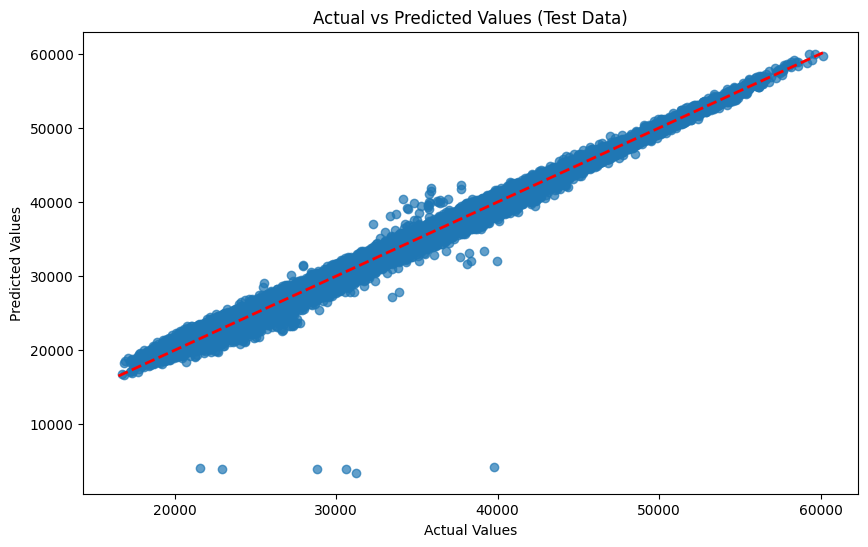

In [14]:
# Visualization of predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Values (Test Data)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Tuning using best method

In [25]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

In [26]:
# Define polynomial degrees and regularization strength to explore
degrees = [1, 2, 3, 4, 5, 6, 7, 8]
alphas = [0.01, 0.1, 1, 10, 100]  # Regularization strengths

In [27]:
# Create a pipeline for PolynomialFeatures and Ridge Regression
pipeline = make_pipeline(PolynomialFeatures(), Ridge())

# Grid search for the best degree and regularization strength
param_grid = {
    'polynomialfeatures__degree': degrees,
    'ridge__alpha': alphas
}

In [28]:
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=0
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('ridge', Ridge())]),
             param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7, 8],
                         'ridge__alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
# Best parameters and model
best_degree = grid_search.best_params_['polynomialfeatures__degree']
best_alpha = grid_search.best_params_['ridge__alpha']
best_model = grid_search.best_estimator_

In [20]:
# Predictions with the fine-tuned model
y_train_pred_best = best_model.predict(X_train)
y_test_pred_best = best_model.predict(X_test)

In [21]:
# Evaluation metrics
mse_train_best = mean_squared_error(y_train, y_train_pred_best)
mse_test_best = mean_squared_error(y_test, y_test_pred_best)
r2_train_best = r2_score(y_train, y_train_pred_best)
r2_test_best = r2_score(y_test, y_test_pred_best)

In [22]:
# Display results
print("Best Polynomial Degree:", best_degree)
print("Best Regularization Alpha:", best_alpha)
print("Train MSE:", mse_train_best)
print("Test MSE:", mse_test_best)
print("Train R2:", r2_train_best)
print("Test R2:", r2_test_best)

Best Polynomial Degree: 8
Best Regularization Alpha: 0.01
Train MSE: 268928.32289319707
Test MSE: 266982.542557349
Train R2: 0.9953437518713568
Test R2: 0.9954151487921763


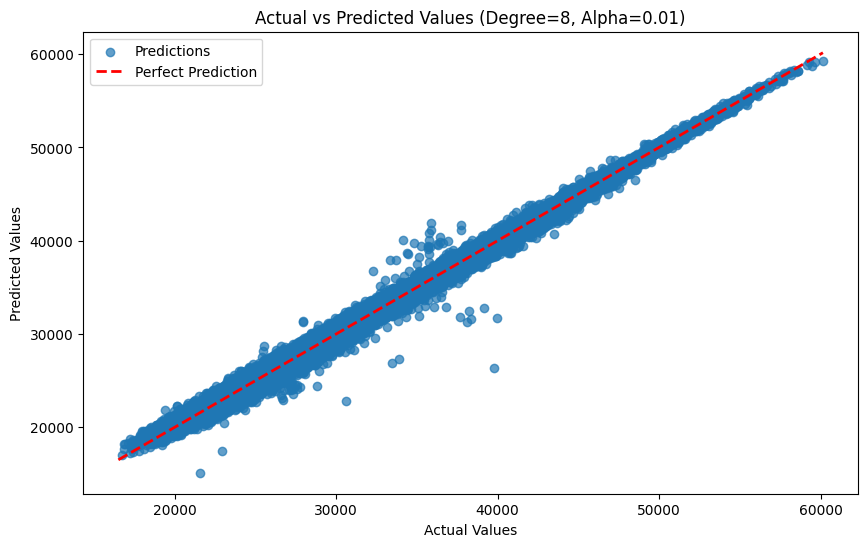

In [23]:
# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_best, alpha=0.7, label='Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.title(f'Actual vs Predicted Values (Degree={best_degree}, Alpha={best_alpha})')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [24]:
import joblib

# Save the best model from GridSearchCV
joblib.dump(model, 'Correct_linearRegression.pkl')
print("Model saved as 'Correct_linearRegression.pkl'")

Model saved as 'Correct_linearRegression.pkl'
